# Linear Regression Practicals on boston housing prices dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the boston housing prices dataset
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()

In [11]:
# We are trying to find the price of boston based on all the independent features
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [15]:
# dataset is given in the form of dictionary i.e key value pair. Hence find the keys.
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [16]:

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
# Input feature data i.e independent feature
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [17]:
# Output data i.e dependent feature
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [126]:
# Get all the features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Lets prepare the dataframe

In [21]:
dataset = pd.DataFrame(data = boston.data, columns= boston.feature_names )

In [22]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# Create the outout feature
dataset['price'] = boston.target

In [25]:
# AIM- datato predict the price
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# To check the data type of all the feature.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
# Basic Statical value of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
#check the missing value
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

Observation: No Missing value

## EDA on Boston housing prices dataset
### Most important thing in Linear Regression is to check the Correlation between dependent and independent feature

In [33]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Observation:- 
1. If CRIM increases price decreases.
3. LSTAT	is 73% correlated with price etc.
3. TAX and RAD is 91% correlated


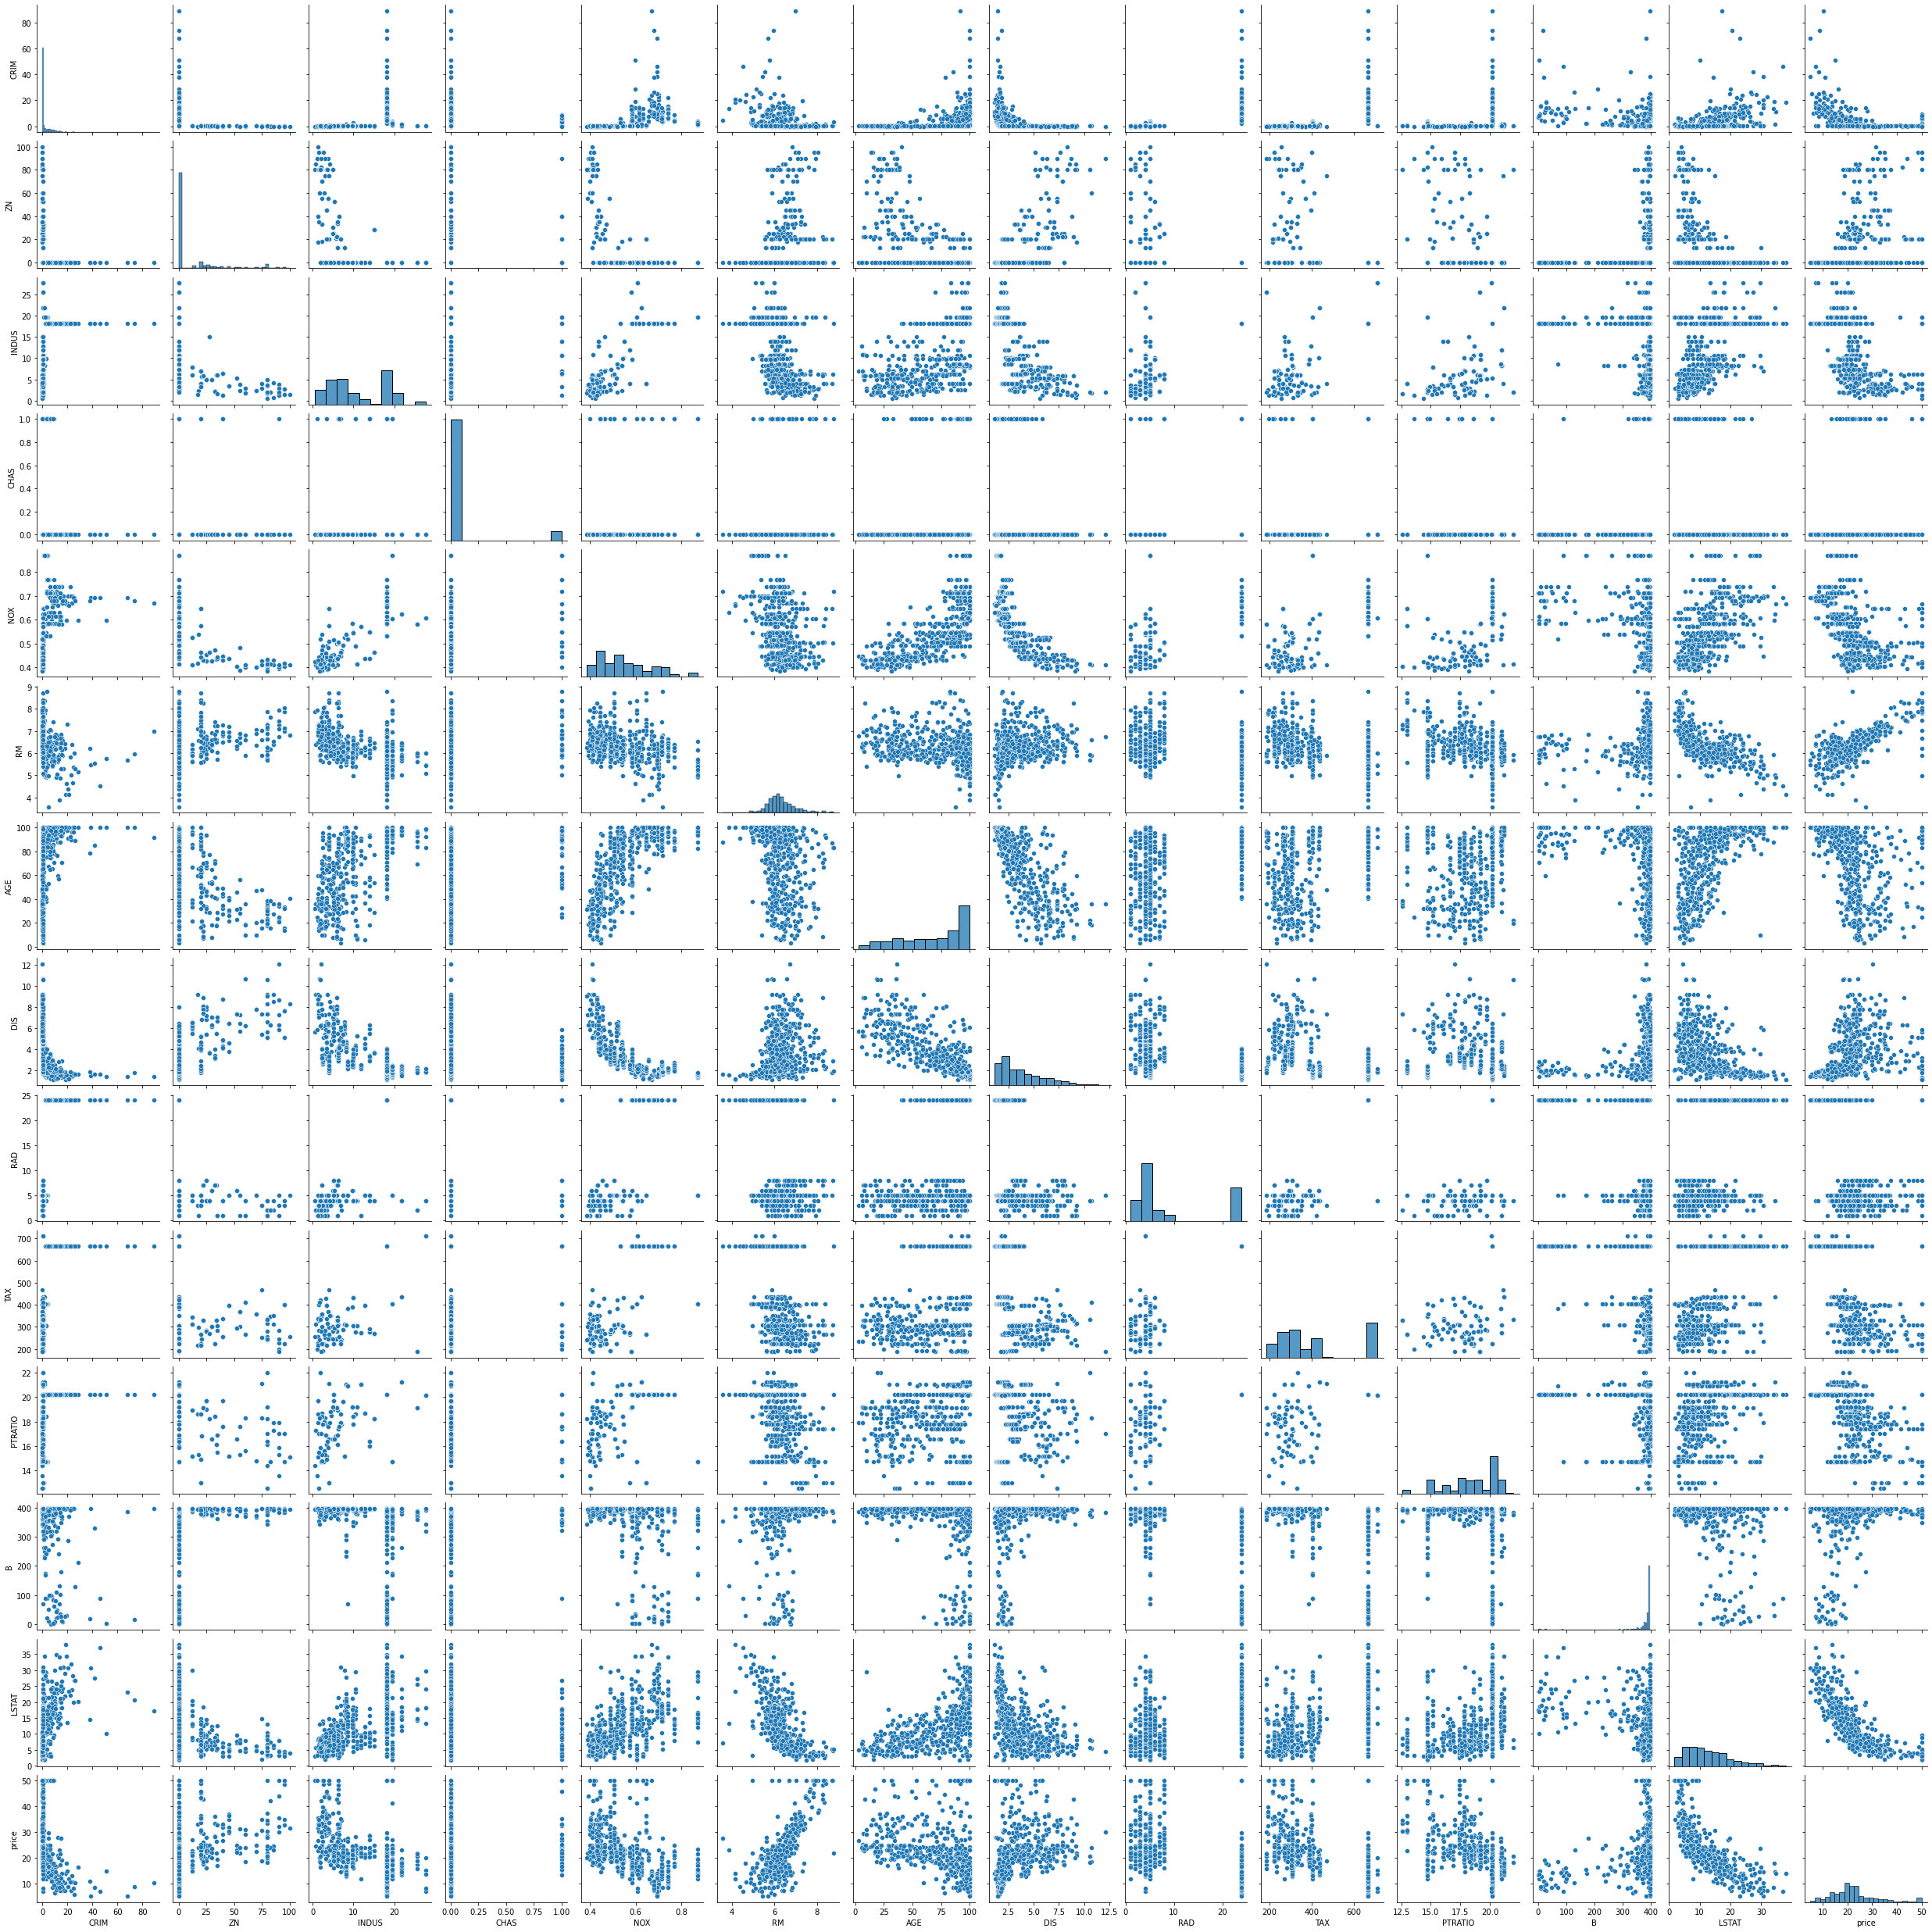

In [34]:
# Visualize it in seaborn using pairplot
sns.pairplot(dataset)


## Heatmap to find the correlation b/w different dependent and independent features

<AxesSubplot:>

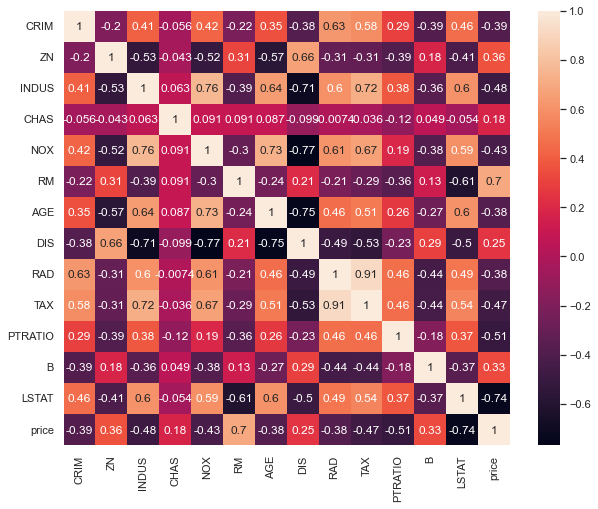

In [41]:
sns.set(rc={'figure.figsize':(10,8)}) # Set the o/p window size
sns.heatmap(dataset.corr(), annot= True) # heatmap of dataset correlation. annot = True gives the value of correlation.


## Scatter Plot

Text(0, 0.5, 'price')

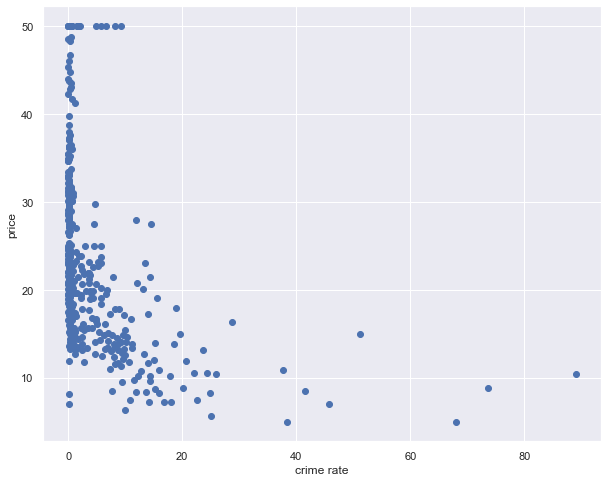

In [45]:
# Scatter plot b/w 'CRIM' and 'price'
plt.scatter(dataset['CRIM'],dataset['price'])
plt.xlabel('crime rate')
plt.ylabel('price')

Observation: Relationship between crime rate and price is negative. Means more crime then less price.

Text(0, 0.5, 'price')

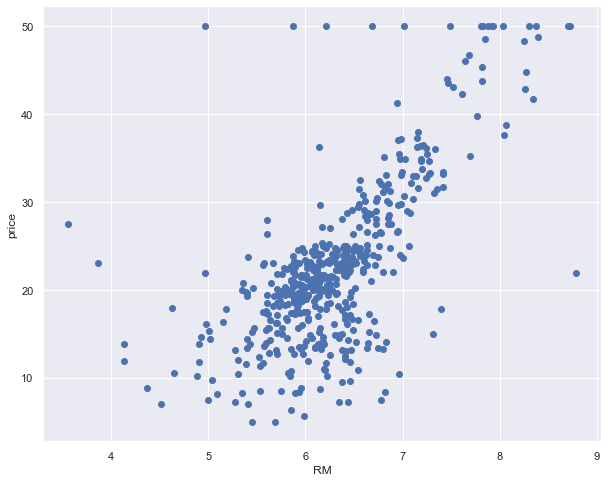

In [48]:
plt.scatter(dataset['RM'], dataset['price'])
plt.xlabel('RM') # RM means 'average number of rooms per dwelling'
plt.ylabel('price')

Observation: No. of room increasing then price is also increasing.

<AxesSubplot:xlabel='RM', ylabel='price'>

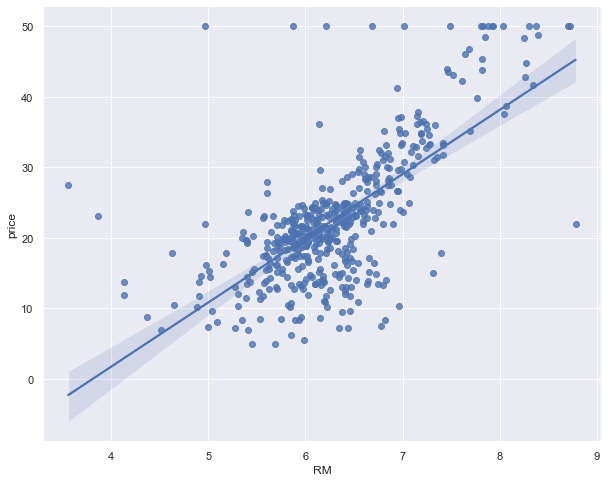

In [49]:
## regplot:- It plots the data in linear model fit
sns.regplot(x = 'RM', y = 'price', data = dataset)

observation:- It is a best fit line. The shaded part is region Lasso. Based on λ value we can reduce overfitting. Line can be rotated in that region.

Wherever concentration of data point is more there is less movement. wherever concentration of data points are less there is more movement.  

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

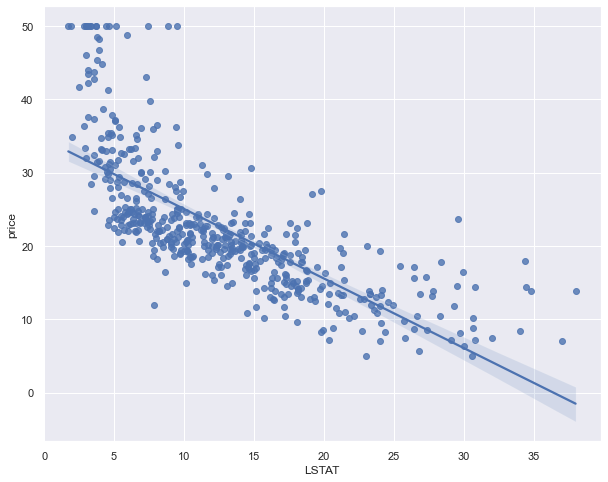

In [51]:
# regplot w.r.t LSTAT and price
# LSTAT is lower status of the population

sns.regplot(x="LSTAT",y="price",data=dataset)

<AxesSubplot:xlabel='CRIM', ylabel='price'>

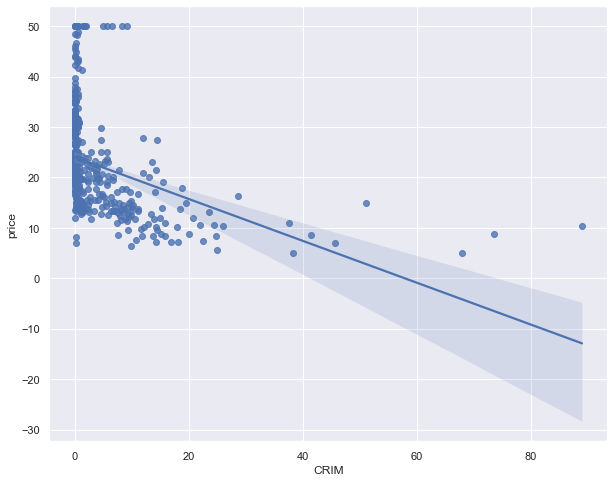

In [54]:
# regplot w.r.t CRIM and price
sns.regplot(x="CRIM",y="price",data=dataset)

## Boxplot

/Users/madhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

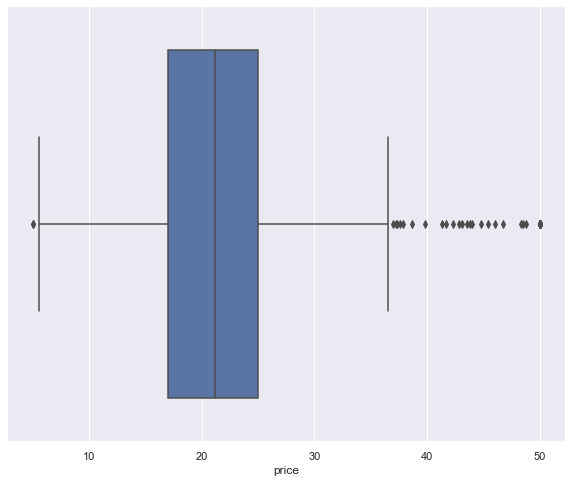

In [56]:
sns.boxplot(dataset['price'])

Observation: since this is dependent feature and we can see there are so many outliers.
 so we will try to do hyperparameter tuning using Lasso or Ridge.

/Users/madhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

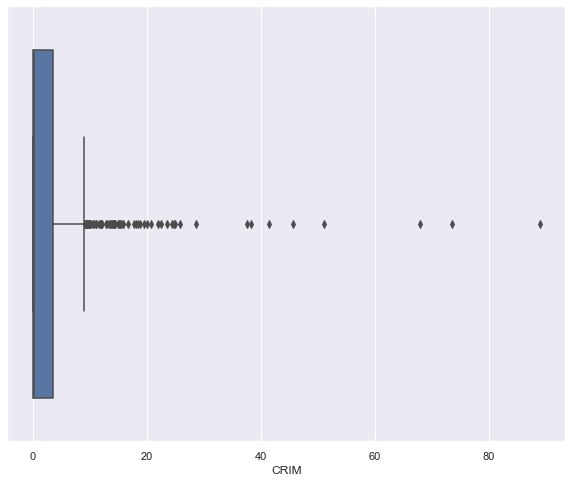

In [136]:
sns.boxplot(dataset['CRIM'])

Observation: So Many outliers are there. Means crime rates are very high in Boston. which is impacting the price. 

## Training the Model

In [58]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
# ## Divide the dataset into Independent And Dependent Features
X = dataset.iloc[:,:-1] # create the independent feature(It will take all the rows and all the columns except last column i.e price)
Y = dataset.iloc[:,-1] # # create the dependent feature (It will take all the rows but only 'price' column i.e last column from the back)

In [64]:
# We got the independent feature in the form of DataFrame
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [139]:
# We got the dependent feature in the form of series. 
Y
             

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

### split the data in train and test data


In [69]:
# import train_test_split function to split the training and testing data
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=10)

X_train o/p is Y_train and X_test o/p is Y_test 

Hence we don't use use X_test and Y_test now. We use it only after our model is getting trained

test_size = 0.33 means 33% of data is going for test data.

Usulally randomly data is getting selected for training and testing. but when if two people give same random_state=10 
 means the value will be same for both of them. means same data will be selected for train and test for both
 people. 

### Training Data

In [72]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09
388,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
238,0.08244,30.0,4.93,0.0,0.428,6.481,18.5,6.1899,6.0,300.0,16.6,379.41,6.36
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,396.90,17.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [73]:
y_train

147    14.6
330    19.8
388    10.2
238    23.7
113    18.7
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: price, Length: 339, dtype: float64

No. of rows in X_train and y_train will be same i.e 339 here

In [77]:
X_train.shape

(339, 13)

In [78]:
y_train.shape

(339,)

### Test Data

In [74]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
451,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97


In [75]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
442    18.4
451    15.2
188    29.8
76     20.0
314    23.8
Name: price, Length: 167, dtype: float64

No. of rows in X_test and y_test will be same i.e 167 here

In [79]:
X_test.shape

(167, 13)

In [80]:
y_test.shape

(167,)

Total no. of rows = 339+167 = 506

In [81]:
dataset.shape

(506, 14)

## Standardize or feature scaling the datasets

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #make object of StandardScaler

In [84]:
scaler

StandardScaler()

In [87]:
# We do standardization for training data using fit_transform() function
X_train=scaler.fit_transform(X_train)

In [88]:
X_test=scaler.transform(X_test)

In [89]:
# transformed X_train data where µ = 0 and σ = 1
X_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

In [90]:
# transformed X_test data where µ = 0 and σ = 1
X_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

### Model Training

In [91]:
from sklearn.linear_model import LinearRegression

In [95]:
# Create an object of linear regression
regression = LinearRegression()

In [97]:
regression

LinearRegression()

In [100]:
# X_train:- Independent Feature or i/p
# y_train:- Dependent Feature or o/p
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
## print the coefficient
print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


In [106]:
# print the intercept
print(regression.intercept_)

22.077286135693218


## Prediction for the test data

In [109]:
# regression is the model which is doing the prediction.
reg_pred=regression.predict(X_test)

In [110]:
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

In [142]:
reg_pred.shape # Since in test data total there are 167 rows. So regression model has predicted price for all the test data.

(167,)

## Assumptions of Linear Regression

### Assumption 1:
When we plot the graph b/w Truth and predicted point we should get the linear relationship. If not then Model is not good.

Text(0, 0.5, 'Test Predicted Data')

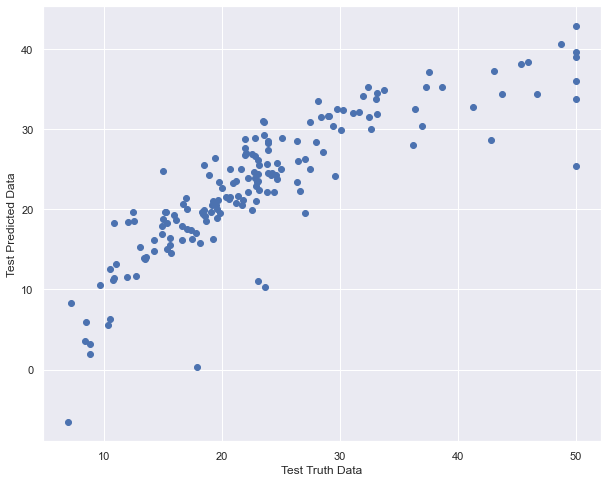

In [112]:
# Validate the model
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## Residuals or Error
Difference between truth and predicted data points

### Assumption 2:
When we plot the residulas graph it should be normally distributed. If not then Model is not good.

In [115]:
residuals=y_test-reg_pred

In [116]:
residuals

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: price, Length: 167, dtype: float64

## displot (Distance plot)
Whenever we are creating displot it should be approximately coming as Gaussian Distribution.
kde-Kernel density estimation .

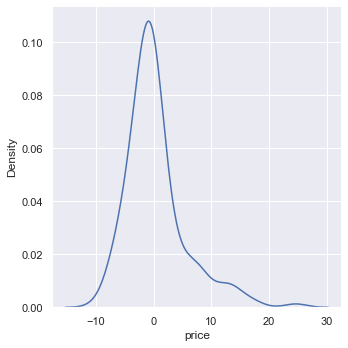

In [117]:
sns.displot(residuals,kind="kde")

## SCatter plot with predictions and residual
### uniform distribution
### Assumption 3:
Once we plot a graph b/w perdicted and residuals it should be uniformally distributed.

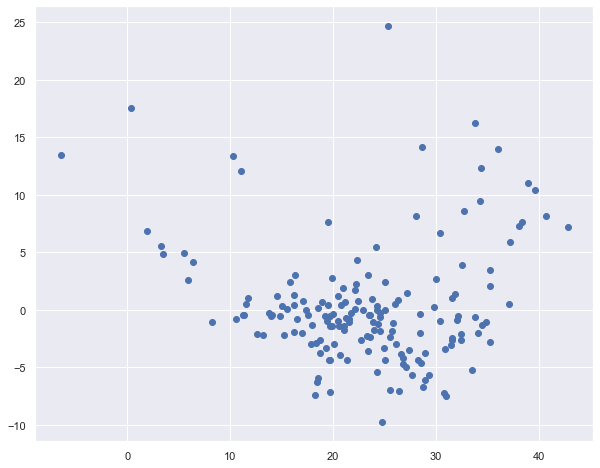

In [118]:
plt.scatter(reg_pred,residuals)

## Performance Metrics

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred))) 

27.100991709962475
3.520658529879791
5.205861284164463


## R square and adjusted R square

In [120]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7165219393967556


In [121]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6924355682343883

## RIdge Regression/ L2 Regression

In [152]:
from sklearn.linear_model import Ridge
ridge = Ridge() # Make an object of Ridge function

In [153]:
# train the model
ridge.fit(X_train,y_train )

Ridge()

In [154]:
ridge.coef_

array([-1.27565151,  1.5819406 , -0.1614208 ,  0.37673024, -1.72386872,
        2.24434183,  0.30956702, -3.26398836,  2.60274628, -1.99924081,
       -1.75198618,  1.25002916, -3.81456087])

In [155]:
ridge.intercept_

22.077286135693218

In [205]:
# predict the o/p
ridge_pred = ridge.predict(X_test)

In [206]:
ridge_pred

array([31.32951625, 31.98180665, 30.96523995, 22.45112285, 18.93171888,
       16.21770197, 35.96932532, 14.8453389 , 25.00644473, 37.08826243,
       21.49615236, 30.86395535, 27.9880323 , 33.98239498, 33.72731108,
       40.61743429, 24.27292247, 23.33888547, 25.52862017, 21.42716828,
       32.68689234, 17.88582539, 25.50293435, 25.01797349, 32.58757636,
       20.48521647, 19.51598666, 16.94098815, 38.35803356,  0.33567931,
       32.44411299, 32.10347472, 26.13567232, 23.81384315, 20.64388179,
       19.71829821,  3.56174179, 35.17319673, 27.02020897, 27.65038259,
       34.3408154 , 29.77237182, 18.39828682, 31.55283209, 17.92580288,
       28.51408759, 19.49631857, 21.65517408, 38.03589465, 16.47721333,
       24.56300743, 19.66060562, 24.490545  , 34.33513167, 26.7462751 ,
       34.83714079, 21.08524522, 19.88396747, 18.65820105, 24.71538111,
       20.00248822, 23.58585608, 39.60689645, 42.79543819, 30.3548884 ,
       17.07425788, 23.84421168,  3.23169724, 31.42539336, 28.75

## Performance Metrics w.r.t Ridge

### Check the loss

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred))) 


27.07649000144063
3.5161044263484267
5.203507471066091


### Check the performance using R-square metrics

In [187]:
from sklearn.metrics import r2_score
score_ridge=r2_score(y_test,ridge_pred)
print(score_ridge)

0.7167782287933788


### Check the performance using Adjusted R-square metrics

In [208]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6927136338542541

## Lasso Regression/L1 Regression

In [209]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [210]:
lasso

Lasso()

In [211]:
# Train the model
lasso.fit(X_train,y_train)

Lasso()

In [212]:
lasso.coef_

array([-0.05088722,  0.        , -0.        ,  0.        , -0.        ,
        2.33991441, -0.        , -0.        , -0.        , -0.        ,
       -1.21265926,  0.50346933, -3.52626441])

In [213]:
lasso.intercept_

22.077286135693218

In [214]:
lasso_pred = lasso.predict(X_test)

In [215]:
lasso_pred

array([25.64194382, 29.81425297, 27.94324255, 27.55256464, 20.99640298,
       18.74520609, 34.28217994, 15.93009427, 20.70883387, 34.07542731,
       19.90502439, 26.60490365, 24.07990755, 29.92866139, 29.22037693,
       36.40160499, 26.2514407 , 19.88117334, 23.967085  , 22.50869347,
       30.87428332, 18.78300957, 23.92041383, 25.68996484, 32.43275786,
       21.59346217, 20.77097939, 19.17145706, 34.09829244,  2.83421427,
       30.5699873 , 29.29565261, 26.85558827, 25.25346658, 19.26477827,
       19.73302762,  7.84289608, 29.77239449, 25.40207471, 25.60513357,
       32.3846261 , 26.89227407, 18.03007537, 29.36340326, 18.91119501,
       27.26813644, 20.46203931, 21.03622196, 34.39115891, 18.05973586,
       23.67935365, 18.6389767 , 22.52686697, 32.78082702, 26.03741902,
       30.39354515, 20.51475327, 20.94796259, 17.76992156, 24.71515119,
       21.39562999, 22.87363803, 36.66878913, 37.88636344, 28.19838095,
       17.67593653, 24.95639783,  5.16197744, 27.44103022, 33.73

In [228]:
# Check performance usning MSE, MAE, RMSE and elastic net
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))



32.16822537607397
3.9064325476573205
5.671703921757021


In [229]:
from sklearn.metrics import r2_score
score_lasso=r2_score(y_test,lasso_pred)
print(score_lasso)

0.6635183597615237


In [230]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6349284164732871

## Elastic Net

In [231]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [232]:
# Train the model
en.fit(X_train,y_train)

ElasticNet()

In [233]:
en.coef_

array([-0.43490082,  0.32641408, -0.2449198 ,  0.19136153, -0.15045186,
        2.09765048, -0.        , -0.        , -0.        , -0.30010971,
       -1.13949057,  0.64784661, -2.30243571])

In [234]:
en.intercept_

22.077286135693218

In [235]:
# Predict the o/p
en_pred=en.predict(X_test)

In [236]:
en_pred

array([26.0417533 , 29.72847396, 28.13249256, 27.33126697, 20.42880538,
       17.74088482, 31.34694254, 16.67485774, 22.66361605, 32.11606238,
       20.44062928, 27.05265082, 24.30388496, 29.10453835, 29.42032134,
       34.87404662, 25.31690008, 21.08018038, 24.04009667, 22.78241695,
       28.62957505, 18.35172223, 23.50225053, 24.94025282, 31.31440303,
       21.87551246, 22.30554751, 18.38033279, 33.5961939 ,  5.07350586,
       31.03524275, 28.19235387, 27.2862085 , 24.92462838, 19.28719449,
       20.2043877 ,  9.65913955, 29.64752478, 24.48773946, 25.34376165,
       30.68019641, 26.22751049, 18.01125345, 29.21052894, 20.61959202,
       27.27830384, 19.56149084, 19.72195809, 33.16071763, 19.16416141,
       23.05862027, 18.66118548, 22.77766754, 31.26962741, 25.0249516 ,
       29.94893114, 20.8407824 , 19.87498778, 18.27542547, 22.76517295,
       20.81723461, 22.76805785, 34.51940602, 36.11020157, 27.24493161,
       18.27047552, 24.17101249,  7.04406772, 26.85508847, 32.20

In [237]:
# Check the loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,en_pred))
print(mean_absolute_error(y_test,en_pred))
print(np.sqrt(mean_squared_error(y_test,en_pred)))

35.341543853934674
4.0356967087691
5.944875427957652


## Check the performance

### R-Square performance

In [238]:
from sklearn.metrics import r2_score
score_en = r2_score(y_test, en_pred)
print(score_en)

0.6303252509112042


### Adjusted R-square performance

In [227]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_en)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5989149781128098